# PyDOT Mar 27 2020 Final Project

## Name <span style="color:blue"><i>Chen, Haoliang</i></span>

## Email <span style="color:blue"><i>chenhl0532@gmail.com</i></span>

## Project Name <span style="color:blue"><i>Vessel Performance Analysis</i></span>

## Problem Statement

<span style="color:blue"><i>Vessel Performance Analysis is to monitor and analyze the ship's in-service performance in terms of fuel oil consumption, speed loss, etc over normally 3-5 years period. The purpose is to understand the ship hull condition over the time in order to evaluate the underwater antifouling coating performance and make optimized ship maintenance decision at early stage to reduce the ship operating cost.</i></span>

## Data Source (if any)

<span style="color:blue"><i>double click to to list your data sources below</i></span>
1. Data source #1
2. Data source #2

In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [189]:
raw_data=pd.read_csv("VDA_IP_09-Feb-2020.csv",parse_dates=['ReportDate'])
###  raw_data=pd.read_csv("VDA_IP_09-Feb-2020.csv")
###  in the above case, the date collumn is read in as a str. 

raw_data.head(3)
column_name=raw_data.columns


In [190]:
type(raw_data['ReportDate'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [124]:
list(column_name)

['VesselCode',
 'Vessel Name',
 'ReportType',
 'ReportMonth',
 'ReportDate',
 'Location',
 'VoyageNo',
 'CharterPartySpeed',
 'VoyOrderSpeed',
 'SteamingHrs',
 'SteamingMin',
 'DistanceMadeGood',
 'AvgSpeed',
 'Stoppages',
 'StoppagesHH',
 'StoppagesMM',
 'Displacement',
 'VoyCondition',
 'DepPort',
 'ArrivalPort',
 'COSPDate',
 'DraftFwd',
 'DraftAft',
 'WindForce',
 'SeaState',
 'Average Speed Through Water',
 'Calorific Value of Fuel',
 'FO Temperature at ME Inlet',
 'Fuel Oil Specific Gravity',
 'REC IFO 3.5',
 'REC MGO',
 'RECVLSFO',
 'MECons IFO3.5',
 'MECons MGO',
 'MECons VLSFO(Sulphur<0.5%)',
 'AECons IFO3.5',
 'AECons MGO0.1',
 'AECons VLSFO(Sulphur<0.5%)',
 'BoilerCons IFO3.5',
 'BoilerCons MGO0.1',
 'BoilerCons VLSFO(Sulphur<0.5%)',
 'ROB IFO3.5',
 'ROB MGO',
 'ROB VLSFO(Sulphur<0.5%)',
 'REC MECC',
 'REC MECYL LOWBN',
 'RECMECYL HighBN',
 'REC AECC',
 'REC HYD',
 'CONS MECC',
 'CONS MECYL LOWBN',
 'MECYLLube HighBN',
 'CONS AECC',
 'CONS_HYD',
 'ROB MECC',
 'ROB MECYL LOWB

# select the useful columns
'VesselCode',
 'Vessel Name',
 'ReportType',
 'ReportMonth',
 'ReportDate',
 'Location',
 'VoyageNo',
 'CharterPartySpeed',
 'SteamingHrs',
 'SteamingMin',
 'DistanceMadeGood',
 'AvgSpeed',
 'Displacement',
 'VoyCondition',
 'DepPort',
 'ArrivalPort',
 'DraftFwd',
 'DraftAft',
 'WindForce',
 'SeaState',
 'Average Speed Through Water', 
 'MECons IFO3.5',
 'MECons MGO',
 'MECons VLSFO(Sulphur<0.5%)',
 'EngineDistance',
 'Slip(%)',
 'MEOutput',
 'MELoadIndicator',
 'METCNo1RPM',
 'METCNo2RPM', 
 'Shaft_Gen_Hrs',
 'Shaft_Gen_Mins', 
 'CharterPartyCons',
 'TotalDisplacement',
 'SinceLastReport', 
 'MidDraft', 
 'CourceT',
 'CurrentDirection',
 'CurrentStrength',
 'Lattitude1',
 'Lattitude2',
 'Lattitude3',
 'Longitud2',
 'Longitud3',
 'Longitude1', 
 'SeaDirection',
 'WindDirectionT']

In [191]:
#define new dataset with only the selected columns
name_columns=['VesselCode', 'Vessel Name', 'ReportType', 'ReportMonth', 'ReportDate', 'Location', 'VoyageNo', 'CharterPartySpeed', 'SteamingHrs', 'SteamingMin', 'DistanceMadeGood', 'AvgSpeed', 'Displacement', 'VoyCondition', 'DepPort', 'ArrivalPort', 'DraftFwd', 'DraftAft', 'WindForce', 'SeaState', 'Average Speed Through Water', 'MECons IFO3.5', 'MECons MGO', 'MECons VLSFO(Sulphur<0.5%)', 'EngineDistance', 'Slip(%)', 'MEOutput', 'MELoadIndicator', 'METCNo1RPM', 'METCNo2RPM', 'Shaft_Gen_Hrs', 'Shaft_Gen_Mins', 'CharterPartyCons', 'TotalDisplacement', 'SinceLastReport', 'MidDraft', 'CourceT', 'CurrentDirection', 'CurrentStrength', 'Lattitude1', 'Lattitude2', 'Lattitude3', 'Longitud2', 'Longitud3', 'Longitude1', 'SeaDirection', 'WindDirectionT']
df_new=raw_data[name_columns]
df_new.head(3)

,VesselCode,Vessel Name,ReportType,ReportMonth,ReportDate,Location,VoyageNo,CharterPartySpeed,SteamingHrs,SteamingMin,...,CurrentDirection,CurrentStrength,Lattitude1,Lattitude2,Lattitude3,Longitud2,Longitud3,Longitude1,SeaDirection,WindDirectionT
0,ECT,MV STRATEGIC ENCOUNTER,Noon at Berth,Feb,2020-02-08,In Port,53,12.5,0,0,...,130,1.0,3,53,N,3,W,77,190,190
1,ECT,MV STRATEGIC ENCOUNTER,Noon at Berth,Feb,2020-02-07,In Port,53,12.5,0,0,...,190,1.0,3,53,N,3,W,77,250,250
2,ECT,MV STRATEGIC ENCOUNTER,Noon at Berth,Feb,2020-02-06,In Port,53,12.5,0,0,...,180,1.0,3,53,N,3,W,77,210,210


In [192]:
vessels=df_new['Vessel Name'].unique()
num_vessels=df_new['Vessel Name'].nunique()

# the data need to be first seperated for each vessel and then the analysis will be done for each vessel individually.
# some KPI results of each vessel should be saved in a master table for the whole fleet


# choose 'MT MTM GIBRALTAR' as an example and then later repeat analysis in a loop

vessel_name='MT MTM GIBRALTAR'
vessel_data=df_new.loc[df_new['Vessel Name']==vessel_name]
vessel_data.head(3)


#speed-power/fuel curve and using regression to generate the fitted curve and formulae


#computer speed loss, fuel increase percentage, etc and calculate the KPI
# read in Bob's file on event dates to seperate data and calculate the performance change
# visualization of some results
# API connection to download AIS data
# API connection to download weather data from Strumfive
# fleet summary



,VesselCode,Vessel Name,ReportType,ReportMonth,ReportDate,Location,VoyageNo,CharterPartySpeed,SteamingHrs,SteamingMin,...,CurrentDirection,CurrentStrength,Lattitude1,Lattitude2,Lattitude3,Longitud2,Longitud3,Longitude1,SeaDirection,WindDirectionT
197,MGB,MT MTM GIBRALTAR,Noon at Sea,Feb,2020-02-08,At Sea,75,12.5,24,0,...,82,2.0,5,41,S,46,E,113,230,230
198,MGB,MT MTM GIBRALTAR,Noon at Sea,Feb,2020-02-07,At Sea,75,12.5,24,0,...,144,2.7,2,52,S,25,E,109,35,30
199,MGB,MT MTM GIBRALTAR,Departure COSP,Feb,2020-02-06,In Port,75,12.5,0,0,...,135,0.9,1,14,N,58,E,103,45,45


In [193]:
#generate some basic stats summary of some key parameters
vessel_data[['AvgSpeed', 'Displacement', 'VoyCondition', 'DraftFwd', 'DraftAft', 'WindForce', 'SeaState', 'Average Speed Through Water', 'MECons IFO3.5', 'MECons MGO', 'MECons VLSFO(Sulphur<0.5%)', 'Slip(%)', 'MEOutput', 'MELoadIndicator', 'METCNo1RPM', 'METCNo2RPM' , 'MidDraft']].describe().transpose()
#vessel_data[['AvgSpeed', 'Displacement']].describe()

,count,mean,std,min,25%,50%,75%,max
AvgSpeed,109.0,7.774037,6.182685,0.00,0.00,11.92,12.78,15.080
Displacement,109.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000
DraftFwd,109.0,7.566972,2.307681,3.39,5.40,9.03,9.60,10.000
DraftAft,109.0,8.469725,1.865709,5.50,6.70,9.72,10.10,10.500
WindForce,109.0,3.706422,1.074130,1.00,3.00,4.00,4.00,7.000
SeaState,109.0,1.798165,0.979227,0.00,1.00,2.00,2.00,4.000
Average Speed Through Water,109.0,11.911560,40.699674,0.00,0.00,10.90,11.60,402.000
MECons IFO3.5,109.0,2.842294,5.773355,0.00,0.00,0.00,0.30,18.820
MECons MGO,109.0,0.809358,3.149210,0.00,0.00,0.00,0.00,17.350
MECons VLSFO(Sulphur<0.5%),109.0,4.375413,6.420933,0.00,0.00,0.00,10.06,18.150


Text(0, 0.5, 'ME output (kw)')

<Figure size 432x288 with 0 Axes>

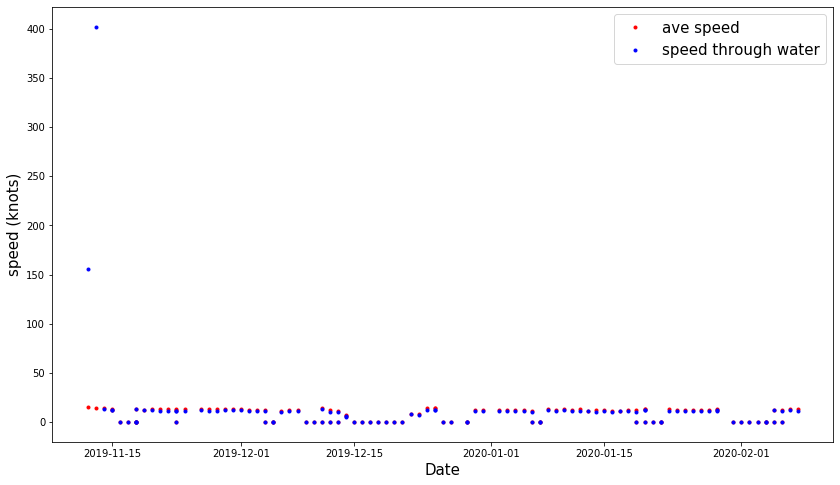

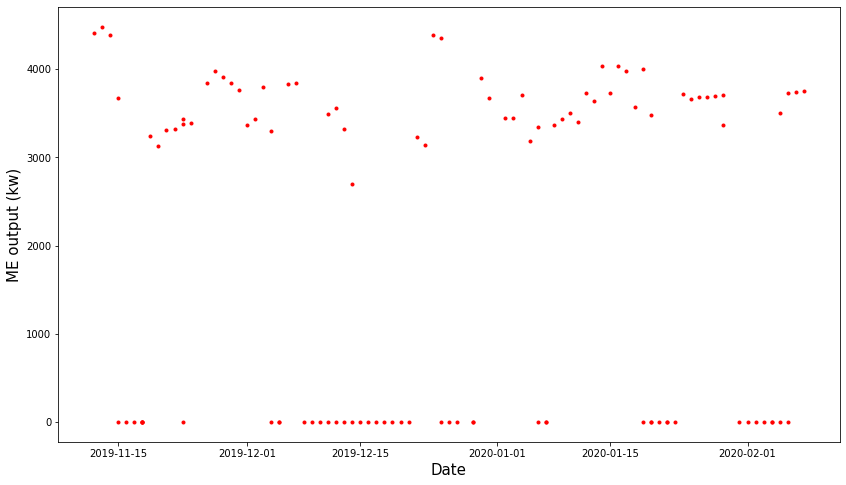

In [210]:
#visualize the raw data to decide the data cleaning strategies.
vessel_data['ReportDate'].describe()
plt.figure(1)
plt.figure(figsize=(14, 8))
plt.plot(vessel_data['ReportDate'],vessel_data['AvgSpeed'],'r.',vessel_data['ReportDate'],vessel_data['Average Speed Through Water'],'b.')
plt.xlabel('Date',fontsize=15)
plt.ylabel('speed (knots)',fontsize=15)
plt.legend(['ave speed', 'speed through water'],fontsize=15)
###  plt.xticks(np.arange(0, len(vessel_data['ReportDate']), step=10))
###  the above is used if the date column is read in as a str. The plot function use numbers in xaxis, then the labels are padded as string.
plt.figure(2)
plt.figure(figsize=(14, 8))
plt.plot(vessel_data['ReportDate'],vessel_data['MEOutput'],'r.')
plt.xlabel('Date',fontsize=15)
plt.ylabel('ME output (kw)',fontsize=15)

# Convert the "ReportDate" to datetime format
#### this session can be done by using parse_date in read_csv. If only for plot purpose, the above setting of xticks also much easier.
#### howaver, it may be worth investigating later on how to successfully assign the new column generated below as a new collumn to the dateframe.
#### currently, the new column cannot be added due to data type issue.
from datetime import datetime
datetime_object=[]
for i in range(len(dates.tolist())):
    datetime_object.append(datetime.strptime(dates.tolist()[i], '%d-%b-%y'))
    #vessel_data['ReportDate'][i]=datetime.strptime(dates.tolist()[i], '%d-%b-%y')
#dates.tolist()[i]=datetime_object
#print(dates.tolist()[i])
#type(datetime_object)
type(datetime_object[0])
vessel_data['ReportDate2']=datetime_object


In [197]:
#filters



In [223]:
# test API
import requests
vessel_IMO='9245770'
date_start='2019-01-01'
date_end='2019-02-01'
url='https://api.akzonobel.com/triton/v2/ais?imo=%s&from=%s&to=%s' %(vessel_IMO,date_start, date_end)
print(url)
# An example call is:
# https://api.akzonobel.com/triton/v2/ais?imo=9245770&from=2019-01-01&to=2019-02-01
# (For vessel 9245770, from 1st Jan 2019 to 1st Feb 2019)

#You will need to add the access key as a header:

Key = 'Ocp-Apim-Subscription-Key'
Value = 'e0b74c7ecd2e449bb5ae0f508b830cf1'
headers = {
    'Ocp-Apim-Subscription-Key': Value,
    #'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}
resp = requests.get(url, headers=headers)

resp.text

https://api.akzonobel.com/triton/v2/ais?imo=9245770&from=2019-01-01&to=2019-02-01


'ï»¿<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <title>Web App - Unavailable</title>\r\n    <style type="text/css">\r\n        html {\r\n            height: 100%;\r\n            width: 100%;\r\n        }\r\n\r\n        #feature {\r\n            width: 960px;\r\n            margin: 95px auto 0 auto;\r\n            overflow: auto;\r\n        }\r\n\r\n        #content {\r\n            font-family: "Segoe UI";\r\n            font-weight: normal;\r\n            font-size: 22px;\r\n            color: #ffffff;\r\n            float: left;\r\n            width: 460px;\r\n            margin-top: 68px;\r\n            margin-left: 0px;\r\n            vertical-align: middle;\r\n        }\r\n\r\n            #content h1 {\r\n                font-family: "Segoe UI Light";\r\n                color: #ffffff;\r\n                font-weight: normal;\r\n                font-size: 60px;\r\n                line-height: 48pt;\r\n                width: 800px;\r\n            }\r\n\r\n        p a, p a:visited, p 